# **Initial EDA & Data Preprocessing**

### **Intalling important libraries and packages**

In [1]:
# Installing Word2Vec library
!pip install --upgrade gensim


     |████████████████████████████████| 23.9MB 1.4MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
# Install NLTK for pre-processing
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# XGBoost
!pip install xgboost

In [4]:
# Installing Stemmer
!pip install snowballstemmer

In [5]:
# Installing for stopword removal
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Tokenization
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py    

In [7]:
# Part of sentence package install
% pip install sentencepiece

     |████████████████████████████████| 1.2MB 9.0MB/s 


In [8]:
# Spell checked: ended up not using it
!pip install pyspelling

     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 40kB 4.7MB/s 


### **Import packages and libraries**

In [9]:
import pandas as pd
import numpy as np
import os

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


import tokenization
from wordcloud import STOPWORDS

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## **Uploading Dataset (raw)**

In [14]:
# Upload Datasets
#df_train = pd.read_csv('/content/drive/MyDrive/WSU/Winter 2021/CSC 7810/Final Project/drugsComTrain_raw.csv')
#df_test=pd.read_csv('/content/drive/MyDrive/WSU/Winter 2021/CSC 7810/Final Project/drugsComTest_raw.csv')

df_train = pd.read_csv('/content/drive/MyDrive/WSU/Winter_2021/CSC 7810/Final Project/bert_train.csv')
df_test= pd.read_csv('/content/drive/MyDrive/WSU/Winter_2021/CSC 7810/Final Project/bert_test.csv')

# Combine datasets
df_main = pd.concat([df_train, df_test], axis=0,ignore_index=True)

In [15]:
# Define the target variable
#df_main['target']=df_main['rating'].apply(lambda x: 1 if x>=8 else 0)
#df_main = df_main.loc[(df_main['rating'] <= 3) | (df_main['rating'] == 10)]
df_main['target']=df_main['rating']

In [16]:
# Remove unncessary columns
#df_main.drop(['uniqueID','rating','date','usefulCount', 'drugName', 'condition'],axis=1,inplace=True)
#df_main.drop(['rating',],axis=1,inplace=True)
df_main.head(100)

,review,rating,target
0,2nd day on 5mg started to work with rock hard ...,0,0
1,"He pulled out, but he cummed a bit in me. I to...",0,0
2,Abilify changed my life. There is hope. I was ...,1,1
3,I Ve had nothing but problems with the Keppe...,0,0
4,"I have taken anti-depressants for years, with ...",1,1
...,...,...,...
95,So much better than the creams.,1,1
96,"F/26, Wellbutrin SR 100mg twice a day & I feel...",1,1
97,I'm a 27 year old white male in good shape but...,1,1
98,I don't think I noticed this at first or even ...,0,0


In [17]:

df_main.loc[(df_main['review']!="")] 

,review,rating,target
0,2nd day on 5mg started to work with rock hard ...,0,0
1,"He pulled out, but he cummed a bit in me. I to...",0,0
2,Abilify changed my life. There is hope. I was ...,1,1
3,I Ve had nothing but problems with the Keppe...,0,0
4,"I have taken anti-depressants for years, with ...",1,1
...,...,...,...
121572,Treatment for ADHD save my life. Don't believe...,1,1
121573,This is my 3rd time taking this medicine. Firs...,1,1
121574,This medicine kept me from sleeping the whole ...,0,0
121575,I have taken Tamoxifen for 5 years. Side effec...,1,1


## **Exploratory Data Analysis**

In [18]:
# word_count
df_main['word_count'] = df_main['review'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_main['unique_word_count'] = df_main['review'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df_main['stop_word_count'] = df_main['review'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# mean_word_length
df_main['mean_word_length'] = df_main['review'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_main['char_count'] = df_main['review'].apply(lambda x: len(str(x)))

# punctuation_count
df_main['punctuation_count'] = df_main['review'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Median word count
df_main['word_count'].median()

80.0

### **Important Plots**

80.0

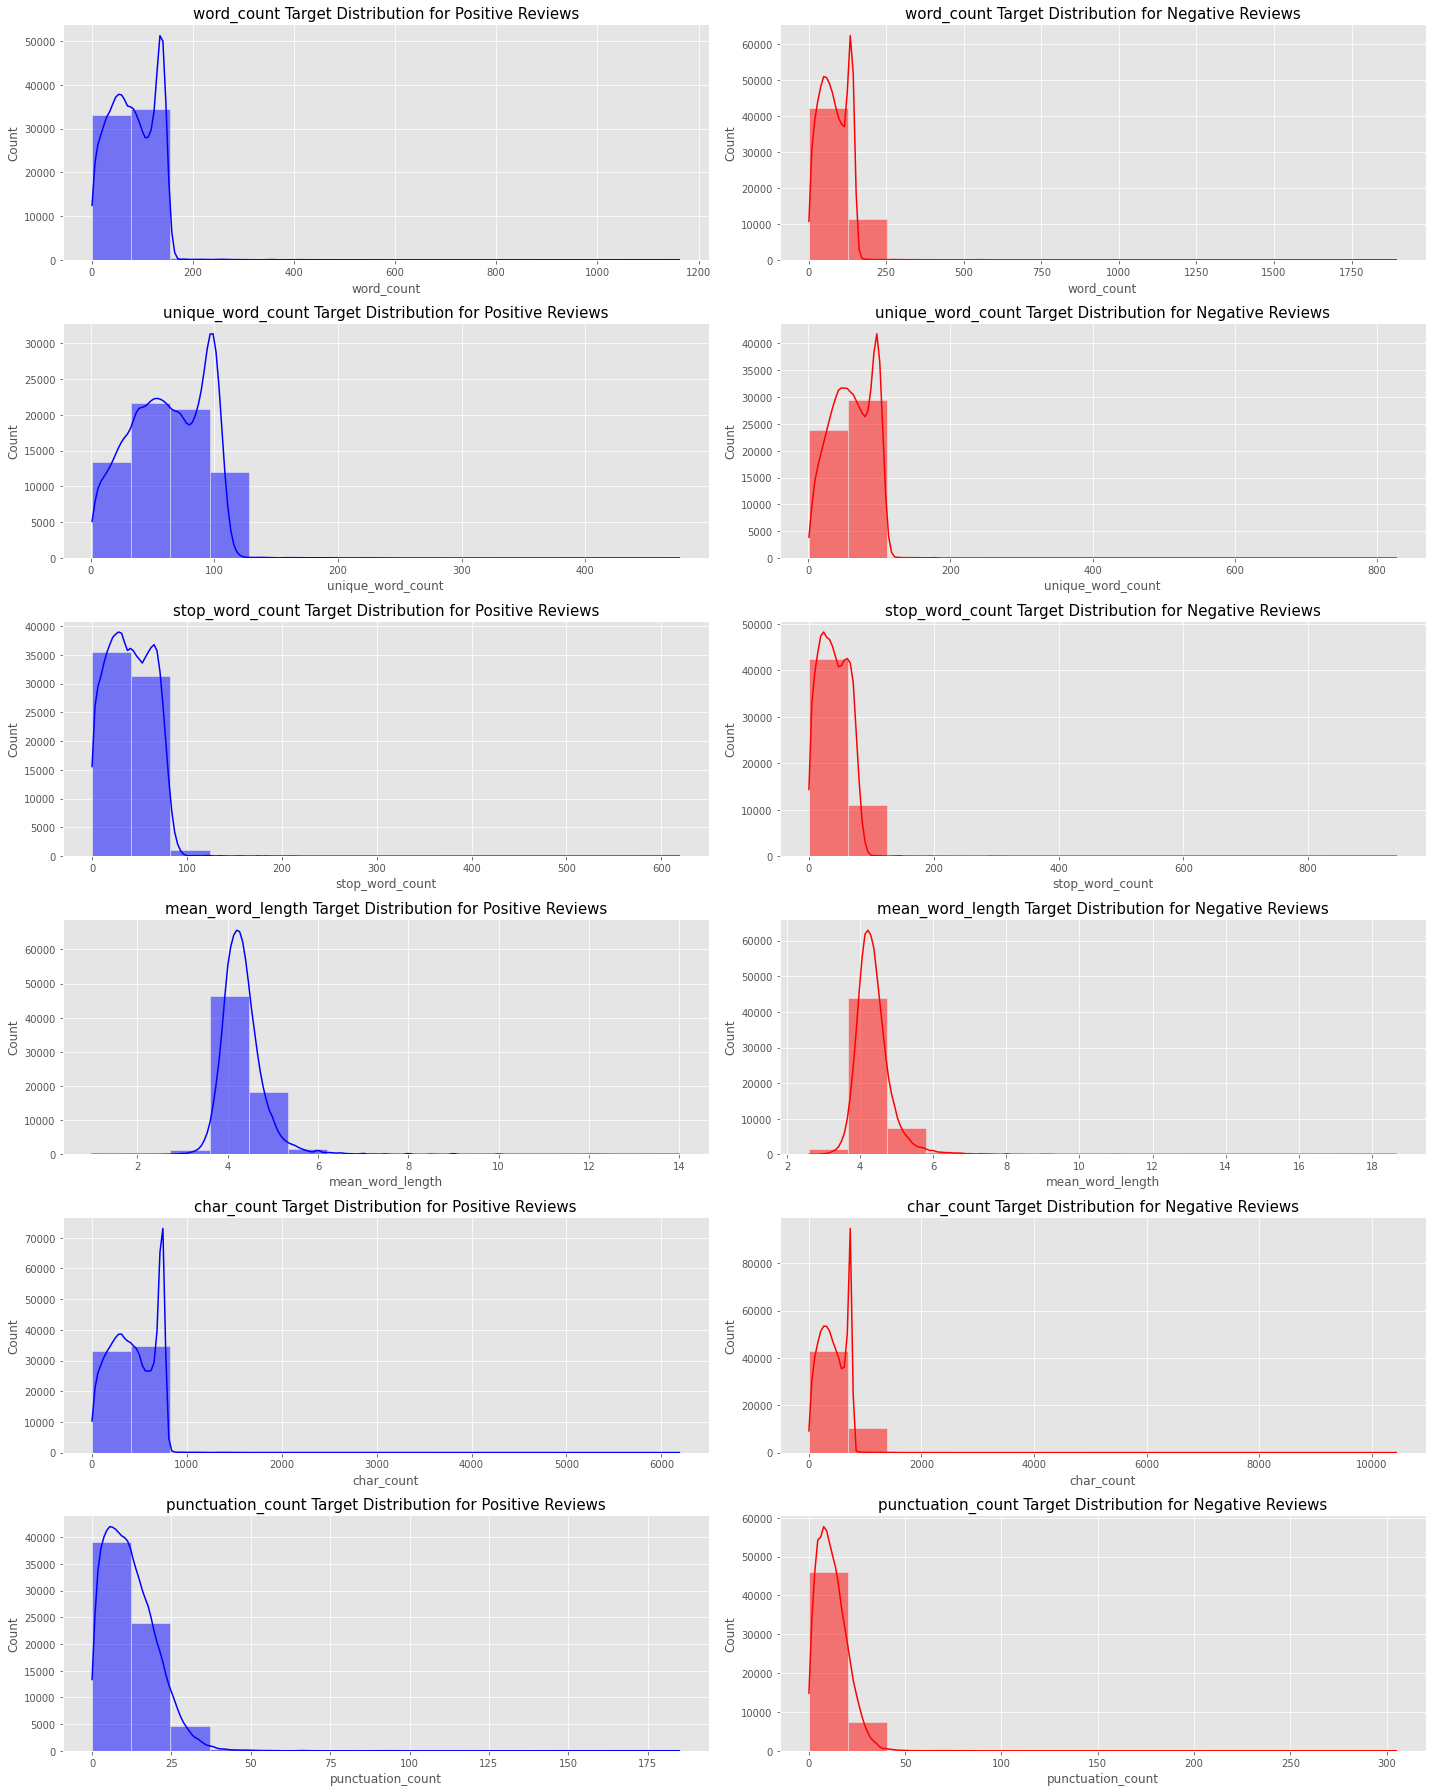

In [19]:
#df_main2 = df_main.loc[(df_main['word_count'] <=200)] 
#df_main2 = df_main2.loc[(df_main['word_count'] >=80)] 

METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count',  'mean_word_length',
                'char_count', 'punctuation_count']
POSITIVE_REVIEWS = df_main['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 25))

for i, feature in enumerate(METAFEATURES):
    sns.histplot(df_main.loc[~POSITIVE_REVIEWS][feature], label='Negative', ax=axes[i][1], color='red', bins =15, kde=True)
    sns.histplot(df_main.loc[POSITIVE_REVIEWS][feature], label='Positive', ax=axes[i][0], color='Blue', bins =15, kde=True)

    
    axes[i][0].set_title(f'{feature} Target Distribution for Positive Reviews', fontsize=15)
    axes[i][1].set_title(f'{feature} Target Distribution for Negative Reviews', fontsize=15)
plt.tight_layout()
df_main['word_count'].median()

### **Target Distribution**

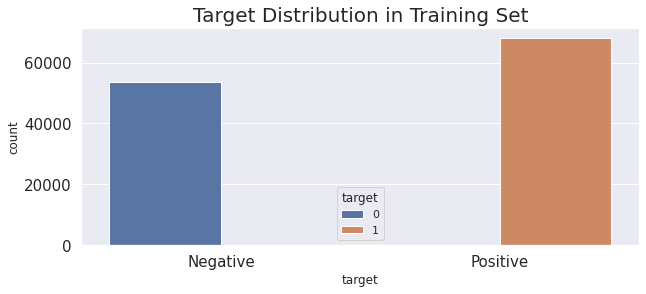

In [45]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x=df_main['target'], hue=df_main['target'], ax=ax)

ax.set_xticklabels(['Negative', 'Positive'])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)


ax.set_title('Target Distribution in Training Set', fontsize=20)

plt.show()

In [ ]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 30

# Unigrams
pos_unigrams = defaultdict(int)
neg_unigrams = defaultdict(int)

for tweet in df_main[POSITIVE_REVIEWS]['review']:
    for word in generate_ngrams(tweet):
        pos_unigrams[word] += 1
        
for tweet in df_main[~POSITIVE_REVIEWS]['review']:
    for word in generate_ngrams(tweet):
        neg_unigrams[word] += 1
        
df_pos_unigrams = pd.DataFrame(sorted(pos_unigrams.items(), key=lambda x: x[1])[::-1])
df_neg_unigrams = pd.DataFrame(sorted(neg_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
posbigrams = defaultdict(int)
negbigrams = defaultdict(int)

for tweet in df_main[POSITIVE_REVIEWS]['review']:
    for word in generate_ngrams(tweet, n_gram=2):
        posbigrams[word] += 1
        
for tweet in df_main[~POSITIVE_REVIEWS]['review']:
    for word in generate_ngrams(tweet, n_gram=2):
        negbigrams[word] += 1
        
df_pos_bigrams = pd.DataFrame(sorted(posbigrams.items(), key=lambda x: x[1])[::-1])
df_neg_bigrams = pd.DataFrame(sorted(negbigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
postrigrams = defaultdict(int)
negtrigrams = defaultdict(int)

for tweet in df_main[POSITIVE_REVIEWS]['review']:
    for word in generate_ngrams(tweet, n_gram=4):
        postrigrams[word] += 1
        
for tweet in df_main[~POSITIVE_REVIEWS]['review']:
    for word in generate_ngrams(tweet, n_gram=4):
        negtrigrams[word] += 1
        
df_pos_trigrams = pd.DataFrame(sorted(postrigrams.items(), key=lambda x: x[1])[::-1])
df_neg_trigrams = pd.DataFrame(sorted(negtrigrams.items(), key=lambda x: x[1])[::-1])

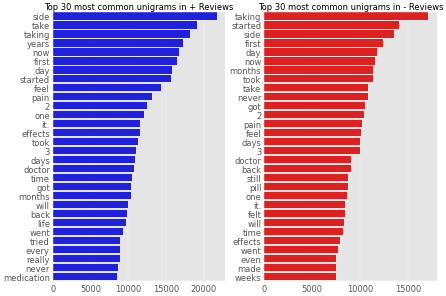

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 10), dpi=30)
plt.tight_layout()

sns.barplot(y=df_pos_unigrams[0].values[:N], x=df_pos_unigrams[1].values[:N], ax=axes[0], color='blue')
sns.barplot(y=df_neg_unigrams[0].values[:N], x=df_neg_unigrams[1].values[:N], ax=axes[1], color='red')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)

axes[0].set_title(f'Top {N} most common unigrams in + Reviews', fontsize=20)
axes[1].set_title(f'Top {N} most common unigrams in - Reviews', fontsize=20)

plt.tight_layout()

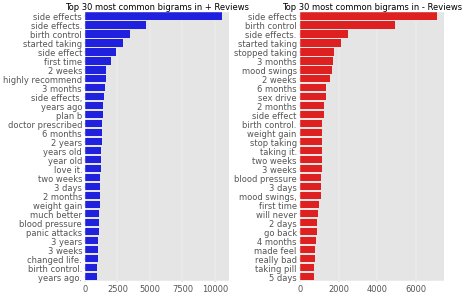

In [ ]:

fig, axes = plt.subplots(ncols=2, figsize=(15, 10), dpi=30)
plt.tight_layout()

sns.barplot(y=df_pos_bigrams[0].values[:N], x=df_pos_bigrams[1].values[:N], ax=axes[0], color='blue')
sns.barplot(y=df_neg_bigrams[0].values[:N], x=df_neg_bigrams[1].values[:N], ax=axes[1], color='red')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)

axes[0].set_title(f'Top {N} most common bigrams in + Reviews', fontsize=20)
axes[1].set_title(f'Top {N} most common bigrams in - Reviews', fontsize=20)

plt.tight_layout()

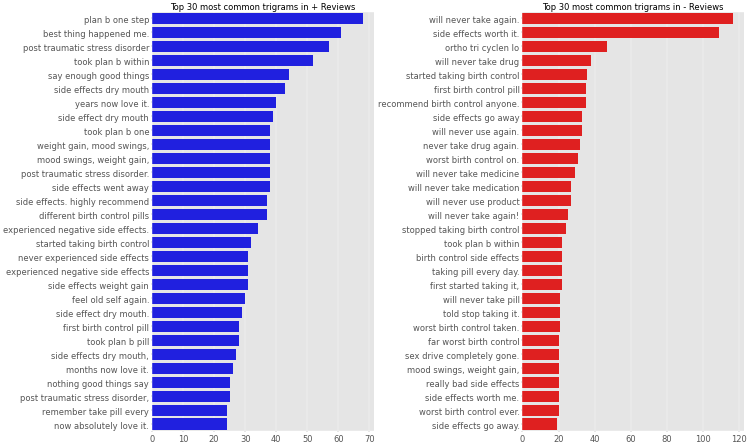

In [ ]:

fig, axes = plt.subplots(ncols=2, figsize=(25, 15), dpi=30)
plt.tight_layout()

sns.barplot(y=df_pos_trigrams[0].values[:N], x=df_pos_trigrams[1].values[:N], ax=axes[0], color='blue')
sns.barplot(y=df_neg_trigrams[0].values[:N], x=df_neg_trigrams[1].values[:N], ax=axes[1], color='red')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)

axes[0].set_title(f'Top {N} most common trigrams in + Reviews', fontsize=20)
axes[1].set_title(f'Top {N} most common trigrams in - Reviews', fontsize=20)

plt.tight_layout()

# Text Preprocessing

## Applying embeddings before pre-processing to check match

We applied the embeddings prior to pre-processing to check what % of words match the embeddings before and after the clean up

In [ ]:
# I downloaded the embeddings manually then uploaded them to my google drive

%%time
import pickle
from time import time
glove_embeddings = np.load('/content/drive/MyDrive/WSU/Winter 2021/CSC 7810/Final Project/glove.840B.300d.pkl', allow_pickle=True)


CPU times: user 6.11 s, sys: 2.98 s, total: 9.09 s
Wall time: 28 s


In [ ]:
%%time
import pickle
from time import time
fasttext_embeddings = np.load('/content/drive/MyDrive/WSU/Winter 2021/CSC 7810/Final Project/crawl-300d-2M.pkl', allow_pickle=True)


CPU times: user 5.92 s, sys: 2.32 s, total: 8.24 s
Wall time: 29.4 s


In [ ]:
import gc
import re
import string
import operator
from collections import defaultdict

def build_vocab(X):
    
    reviews = X.apply(lambda s: s.split()).values      
    vocab = {}
    
    for review in reviews:
        for word in review:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1                
    return vocab


def check_embeddings_coverage(X, embeddings):
    
    vocab = build_vocab(X)    
    
    covered = {}
    oov = {}    
    n_covered = 0
    n_oov = 0
    
    for word in vocab:
        try:
            covered[word] = embeddings[word]
            n_covered += vocab[word]
        except:
            oov[word] = vocab[word]
            n_oov += vocab[word]
            
    vocab_coverage = len(covered) / len(vocab)
    text_coverage = (n_covered / (n_covered + n_oov))
    
    sorted_oov = sorted(oov.items(), key=operator.itemgetter(1))[::-1]
    return sorted_oov, vocab_coverage, text_coverage

In [ ]:
# Checking GloVe coverage
data_glove_oov, data_glove_vocab_coverage, data_glove_text_coverage = check_embeddings_coverage(df_main['review'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Data Set'.format(data_glove_vocab_coverage, data_glove_text_coverage))

GloVe Embeddings cover 34.01% of vocabulary and 92.76% of text in Data Set


In [ ]:
# Checking FastText coverage
data_fasttext_oov, data_fasttext_vocab_coverage, data_fasttext_text_coverage = check_embeddings_coverage(df_main['review'], fasttext_embeddings)
print('FastText Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Data Set'.format(data_fasttext_vocab_coverage, data_fasttext_text_coverage))

FastText Embeddings cover 37.98% of vocabulary and 94.36% of text in Data Set


In [ ]:
test_text = "This medication has literally saved my life!! I was severely depressed and had horrible anxiety and almost committed suicide. The first week on this drug was awful and I was very sick....then a miracle happened. After only a couple of weeks I suddenly realised that I felt 'normal', my thoughts were clear and organised, I was able to laugh, focus, I didn't feel like crying anymore, my fun-loving personality was shining through once more and I became a better version of me. Everyone has noticed and commented, I am now a great person to be around. I am able to work and eat and sleep and function like a normal young woman and it's all thanks to this amazing drug. It really has given me my life back."

In [ ]:
test_text

"This medication has literally saved my life!! I was severely depressed and had horrible anxiety and almost committed suicide. The first week on this drug was awful and I was very sick....then a miracle happened. After only a couple of weeks I suddenly realised that I felt 'normal', my thoughts were clear and organised, I was able to laugh, focus, I didn't feel like crying anymore, my fun-loving personality was shining through once more and I became a better version of me. Everyone has noticed and commented, I am now a great person to be around. I am able to work and eat and sleep and function like a normal young woman and it's all thanks to this amazing drug. It really has given me my life back."

### **Begin Text Preprcessing**

In [ ]:
%%time

def clean(review): 
            
    # Special characters
    review = re.sub(r"\x89Û_", "", review)
    review = re.sub(r"\x89ÛÒ", "", review)
    review = re.sub(r"\x89ÛÓ", "", review)
    review = re.sub(r"\x89ÛÏWhen", "When", review)
    review = re.sub(r"\x89ÛÏ", "", review)
    review = re.sub(r"China\x89Ûªs", "China's", review)
    review = re.sub(r"let\x89Ûªs", "let's", review)
    review = re.sub(r"\x89Û÷", "", review)
    review = re.sub(r"\x89Ûª", "", review)
    review = re.sub(r"\x89Û\x9d", "", review)
    review = re.sub(r"å_", "", review)
    review = re.sub(r"\x89Û¢", "", review)
    review = re.sub(r"\x89Û¢åÊ", "", review)
    review = re.sub(r"fromåÊwounds", "from wounds", review)
    review = re.sub(r"åÊ", "", review)
    review = re.sub(r"åÈ", "", review)
    review = re.sub(r"JapÌ_n", "Japan", review)    
    review = re.sub(r"Ì©", "e", review)
    review = re.sub(r"å¨", "", review)
    review = re.sub(r"SuruÌ¤", "Suruc", review)
    review = re.sub(r"åÇ", "", review)
    review = re.sub(r"å£3million", "3 million", review)
    review = re.sub(r"åÀ", "", review)
    
    # Contractions
    review = re.sub(r"he's", "he is", review)
    review = re.sub(r"there's", "there is", review)
    review = re.sub(r"We're", "We are", review)
    review = re.sub(r"That's", "That is", review)
    review = re.sub(r"won't", "will not", review)
    review = re.sub(r"they're", "they are", review)
    review = re.sub(r"Can't", "Cannot", review)
    review = re.sub(r"wasn't", "was not", review)
    review = re.sub(r"don\x89Ûªt", "do not", review)
    review = re.sub(r"aren't", "are not", review)
    review = re.sub(r"isn't", "is not", review)
    review = re.sub(r"What's", "What is", review)
    review = re.sub(r"haven't", "have not", review)
    review = re.sub(r"hasn't", "has not", review)
    review = re.sub(r"There's", "There is", review)
    review = re.sub(r"He's", "He is", review)
    review = re.sub(r"It's", "It is", review)
    review = re.sub(r"You're", "You are", review)
    review = re.sub(r"I'M", "I am", review)
    review = re.sub(r"shouldn't", "should not", review)
    review = re.sub(r"wouldn't", "would not", review)
    review = re.sub(r"i'm", "I am", review)
    review = re.sub(r"I\x89Ûªm", "I am", review)
    review = re.sub(r"I'm", "I am", review)
    review = re.sub(r"Isn't", "is not", review)
    review = re.sub(r"Here's", "Here is", review)
    review = re.sub(r"you've", "you have", review)
    review = re.sub(r"you\x89Ûªve", "you have", review)
    review = re.sub(r"we're", "we are", review)
    review = re.sub(r"what's", "what is", review)
    review = re.sub(r"couldn't", "could not", review)
    review = re.sub(r"we've", "we have", review)
    review = re.sub(r"it\x89Ûªs", "it is", review)
    review = re.sub(r"doesn\x89Ûªt", "does not", review)
    review = re.sub(r"It\x89Ûªs", "It is", review)
    review = re.sub(r"Here\x89Ûªs", "Here is", review)
    review = re.sub(r"who's", "who is", review)
    review = re.sub(r"I\x89Ûªve", "I have", review)
    review = re.sub(r"y'all", "you all", review)
    review = re.sub(r"can\x89Ûªt", "cannot", review)
    review = re.sub(r"would've", "would have", review)
    review = re.sub(r"it'll", "it will", review)
    review = re.sub(r"we'll", "we will", review)
    review = re.sub(r"wouldn\x89Ûªt", "would not", review)
    review = re.sub(r"We've", "We have", review)
    review = re.sub(r"he'll", "he will", review)
    review = re.sub(r"Y'all", "You all", review)
    review = re.sub(r"Weren't", "Were not", review)
    review = re.sub(r"Didn't", "Did not", review)
    review = re.sub(r"they'll", "they will", review)
    review = re.sub(r"they'd", "they would", review)
    review = re.sub(r"DON'T", "DO NOT", review)
    review = re.sub(r"That\x89Ûªs", "That is", review)
    review = re.sub(r"they've", "they have", review)
    review = re.sub(r"i'd", "I would", review)
    review = re.sub(r"should've", "should have", review)
    review = re.sub(r"You\x89Ûªre", "You are", review)
    review = re.sub(r"where's", "where is", review)
    review = re.sub(r"Don\x89Ûªt", "Do not", review)
    review = re.sub(r"we'd", "we would", review)
    review = re.sub(r"i'll", "I will", review)
    review = re.sub(r"weren't", "were not", review)
    review = re.sub(r"They're", "They are", review)
    review = re.sub(r"Can\x89Ûªt", "Cannot", review)
    review = re.sub(r"you\x89Ûªll", "you will", review)
    review = re.sub(r"I\x89Ûªd", "I would", review)
    review = re.sub(r"let's", "let us", review)
    review = re.sub(r"it's", "it is", review)
    review = re.sub(r"can't", "cannot", review)
    review = re.sub(r"don't", "do not", review)
    review = re.sub(r"you're", "you are", review)
    review = re.sub(r"i've", "I have", review)
    review = re.sub(r"that's", "that is", review)
    review = re.sub(r"i'll", "I will", review)
    review = re.sub(r"doesn't", "does not", review)
    review = re.sub(r"i'd", "I would", review)
    review = re.sub(r"didn't", "did not", review)
    review = re.sub(r"ain't", "am not", review)
    review = re.sub(r"you'll", "you will", review)
    review = re.sub(r"I've", "I have", review)
    review = re.sub(r"Don't", "do not", review)
    review = re.sub(r"I'll", "I will", review)
    review = re.sub(r"I'd", "I would", review)
    review = re.sub(r"Let's", "Let us", review)
    review = re.sub(r"you'd", "You would", review)
    review = re.sub(r"It's", "It is", review)
    review = re.sub(r"Ain't", "am not", review)
    review = re.sub(r"Haven't", "Have not", review)
    review = re.sub(r"Could've", "Could have", review)
    review = re.sub(r"youve", "you have", review)  
    review = re.sub(r"donå«t", "do not", review)   
            
    # Character entity references
    review = re.sub(r"&gt;", ">", review)
    review = re.sub(r"&lt;", "<", review)
    review = re.sub(r"&amp;", "&", review)
    
    # Typos, slang and informal abbreviations
    review = re.sub(r"w/e", "whatever", review)
    review = re.sub(r"w/", "with", review)
    review = re.sub(r"USAgov", "USA government", review)
    review = re.sub(r"recentlu", "recently", review)
    review = re.sub(r"Ph0tos", "Photos", review)
    review = re.sub(r"amirite", "am I right", review)
    review = re.sub(r"exp0sed", "exposed", review)
    review = re.sub(r"<3", "love", review)
    review = re.sub(r"amageddon", "armageddon", review)
    review = re.sub(r"Trfc", "Traffic", review)
    review = re.sub(r"8/5/2015", "2015-08-05", review)
    review = re.sub(r"WindStorm", "Wind Storm", review)
    review = re.sub(r"8/6/2015", "2015-08-06", review)
    review = re.sub(r"10:38PM", "10:38 PM", review)
    review = re.sub(r"10:30pm", "10:30 PM", review)
    review = re.sub(r"16yr", "16 year", review)
    review = re.sub(r"lmao", "laughing my ass off", review)   
    review = re.sub(r"TRAUMATISED", "traumatized", review)
    
               
    # Urls
    review = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", review)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        review = review.replace(p, f' {p} ')
        
    # ... and ..
    review = review.replace('...', ' ... ')
    if '...' not in review:
        review = review.replace('..', ' ... ')      
        
    return review

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [ ]:
# NLTK
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"039", " ", text)
    
    text = text.split()
    lemma_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lemma_words)


    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df_main['text_cleaned'] = df_main['review'].apply(lambda s : clean(s))


In [ ]:
df_main['text_cleaned2'] = df_main['text_cleaned'].apply(lambda s : clean_text(s))


In [ ]:
pd.set_option('display.max_colwidth', -1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,review,rating,target,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,text_cleaned,text_cleaned2
0,"2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake me up & hurt! Leg/ankles aches severe lower bowel preassure like you need to go #2 but can't! Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply! I'm 50 & work out 3Xs a week. Not worth side effects!",0,0,68,58,22,4.617647,383,14,"2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure . 3rd day erections would wake me up & hurt ! Leg / ankles aches severe lower bowel preassure like you need to go # 2 but cannot ! Enjoyed the initial rockhard erections but not at these side effects or $ 230 for months supply ! I am 50 & work out 3Xs a week . Not worth side effects !",2nd day 5mg started work rock hard erection however experianced headache lower bowel preassure 3rd day erection would wake hurt leg ankle ache severe lower bowel preassure like need cannot enjoyed initial rockhard erection side effect 230 month supply work 3xs week worth side effect
1,"He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I'm pregnant.",0,0,30,27,10,3.533333,135,7,"He pulled out, but he cummed a bit in me . I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I am pregnant .",pulled out cummed bit took plan hour later took pregnancy test two week later pregnant
2,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I'm not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.",1,1,146,94,81,3.972603,726,20,"Abilify changed my life . There is hope . I was on Zoloft and Clonidine when I first started Abilify at the age of 15 . . Zoloft for depression and Clondine to manage my complete rage . My moods were out of control . I was depressed and hopeless one second and then mean, irrational, and full of rage the next . My Dr . prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I am not . . Bi - polar disorder is a constant battle . I know Abilify works for me because I have tried to get off it and lost complete control over my emotions . Went back on it and I was golden again . I am on 5mg 2x daily . I am now 21 and better than I have ever been in the past . Only side effect is I like to eat a lot .",abilify changed life hope zoloft clonidine first started abilify age zoloft depression clondine manage complete rage mood control depressed hopeless one second mean irrational full rage next prescribed 2mg abilify point feel like cured though know polar disorder constant battle know abilify work tried get lost complete control emotion went back golden 5mg daily better ever past side effect like eat lot
3,I Ve had nothing but problems with the Keppera : constant shaking in my arms & legs & pins & needles feeling in my arms & legs severe light headedness no appetite & etc.,0,0,34,26,10,4.000000,171,7,I Ve had nothing but problems with the Keppera : constant shaking in my arms & legs & pins & needles feeling in my arms & legs severe light headedness no appetite & etc .,nothing problem keppera constant shaking arm leg pin needle feeling arm leg severe li

In [ ]:
df_main.drop(['review','word_count','unique_word_count','stop_word_count', 'mean_word_length', 'char_count', 'punctuation_count', 'text_cleaned'],axis=1,inplace=True)

In [ ]:
df_main['review'] = df_main['text_cleaned2']
df_main.drop(['text_cleaned2'],axis=1,inplace=True)

### Checking word count after preprocessing

In [ ]:
# word_count
df_main['word_count'] = df_main['review'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_main['unique_word_count'] = df_main['review'].apply(lambda x: len(set(str(x).split())))

# mean_word_length
df_main['mean_word_length'] = df_main['review'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_main['char_count'] = df_main['review'].apply(lambda x: len(str(x)))



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [ ]:
#df_main.head(10)

,rating,target,word_count,unique_word_count,mean_word_length,char_count,review
0,0,0,45,36,5.311111,283,2nd day 5mg started work rock hard erection however experianced headache lower bowel preassure 3rd day erection would wake hurt leg ankle ache severe lower bowel preassure like need cannot enjoyed initial rockhard erection side effect 230 month supply work 3xs week worth side effect
1,0,0,15,13,4.800000,86,pulled cummed bit took plan hour later took pregnancy test two week later pregnant
2,1,1,62,53,5.548387,405,abilify changed life hope zoloft clonidine first started abilify age zoloft depression clondine manage complete rage mood control depressed hopeless one second mean irrational full rage next prescribed 2mg abilify point feel like cured though know polar disorder constant battle know abilify work tried get lost complete control emotion went back golden 5mg daily better ever past side effect like eat lot
3,0,0,17,15,5.647059,112,nothing problem keppera constant shaking arm leg pin needle feeling arm leg severe light headedness appetite etc
4,1,1,44,39,5.727273,295,taken anti depressant year improvement mostly moderate severe side affect make take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
5,0,0,32,31,6.593750,242,crohn resection year ago mostly remission since recently bad flare narrowing anastomosis need medication found one handle asacol gave serious body aching fatigue could function pentasa immediately gave heart palpitation arrhythmia discontinue
6,0,0,51,45,5.235294,317,little bit lingering cough cold giving much trouble except keep night heard good took could get sleep helped tremendously cough bad stomach cramp diarrhea eaten anything upset stomach really feel like bug looked side effect delsym wish done first probably would taken worked cough still get sleep due stomach issue
7,0,0,70,52,5.414286,448,started nexplanon month ago minimal amount contraception take due inability take hormone used birth control trying give time one option right honestly option would get removed never acne problem life immediately broke getting implanted sex drive completely gone used sex boyfriend day week completely forced even fun anymore mean birth control like sex want get pregnant take birth control take away sex unhappy hope get back time getting removed
8,1,1,64,60,6.125000,455,every medicine sun seems manage hypomania mania bipolar2 within day starting lamictal tegretol someone turned light head way normal people think one first thing struck sleep like log irritability almost anger would considered normal able focus creative impulsive thought decreased enough manageable god send would perennially state hypo mania sound great physically emotionally exhausted libido markedly lower wonder perhaps effect hypo manic take anxiety
9,1,1,42,35,5.285714,263,tasigna year 300mg time day tasigna worked within week remission basically entire year side effect feel sick stomach tired severe leg arm pain cannot walk long without needing break went working full time working tired time hey remission alive really problem nope


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

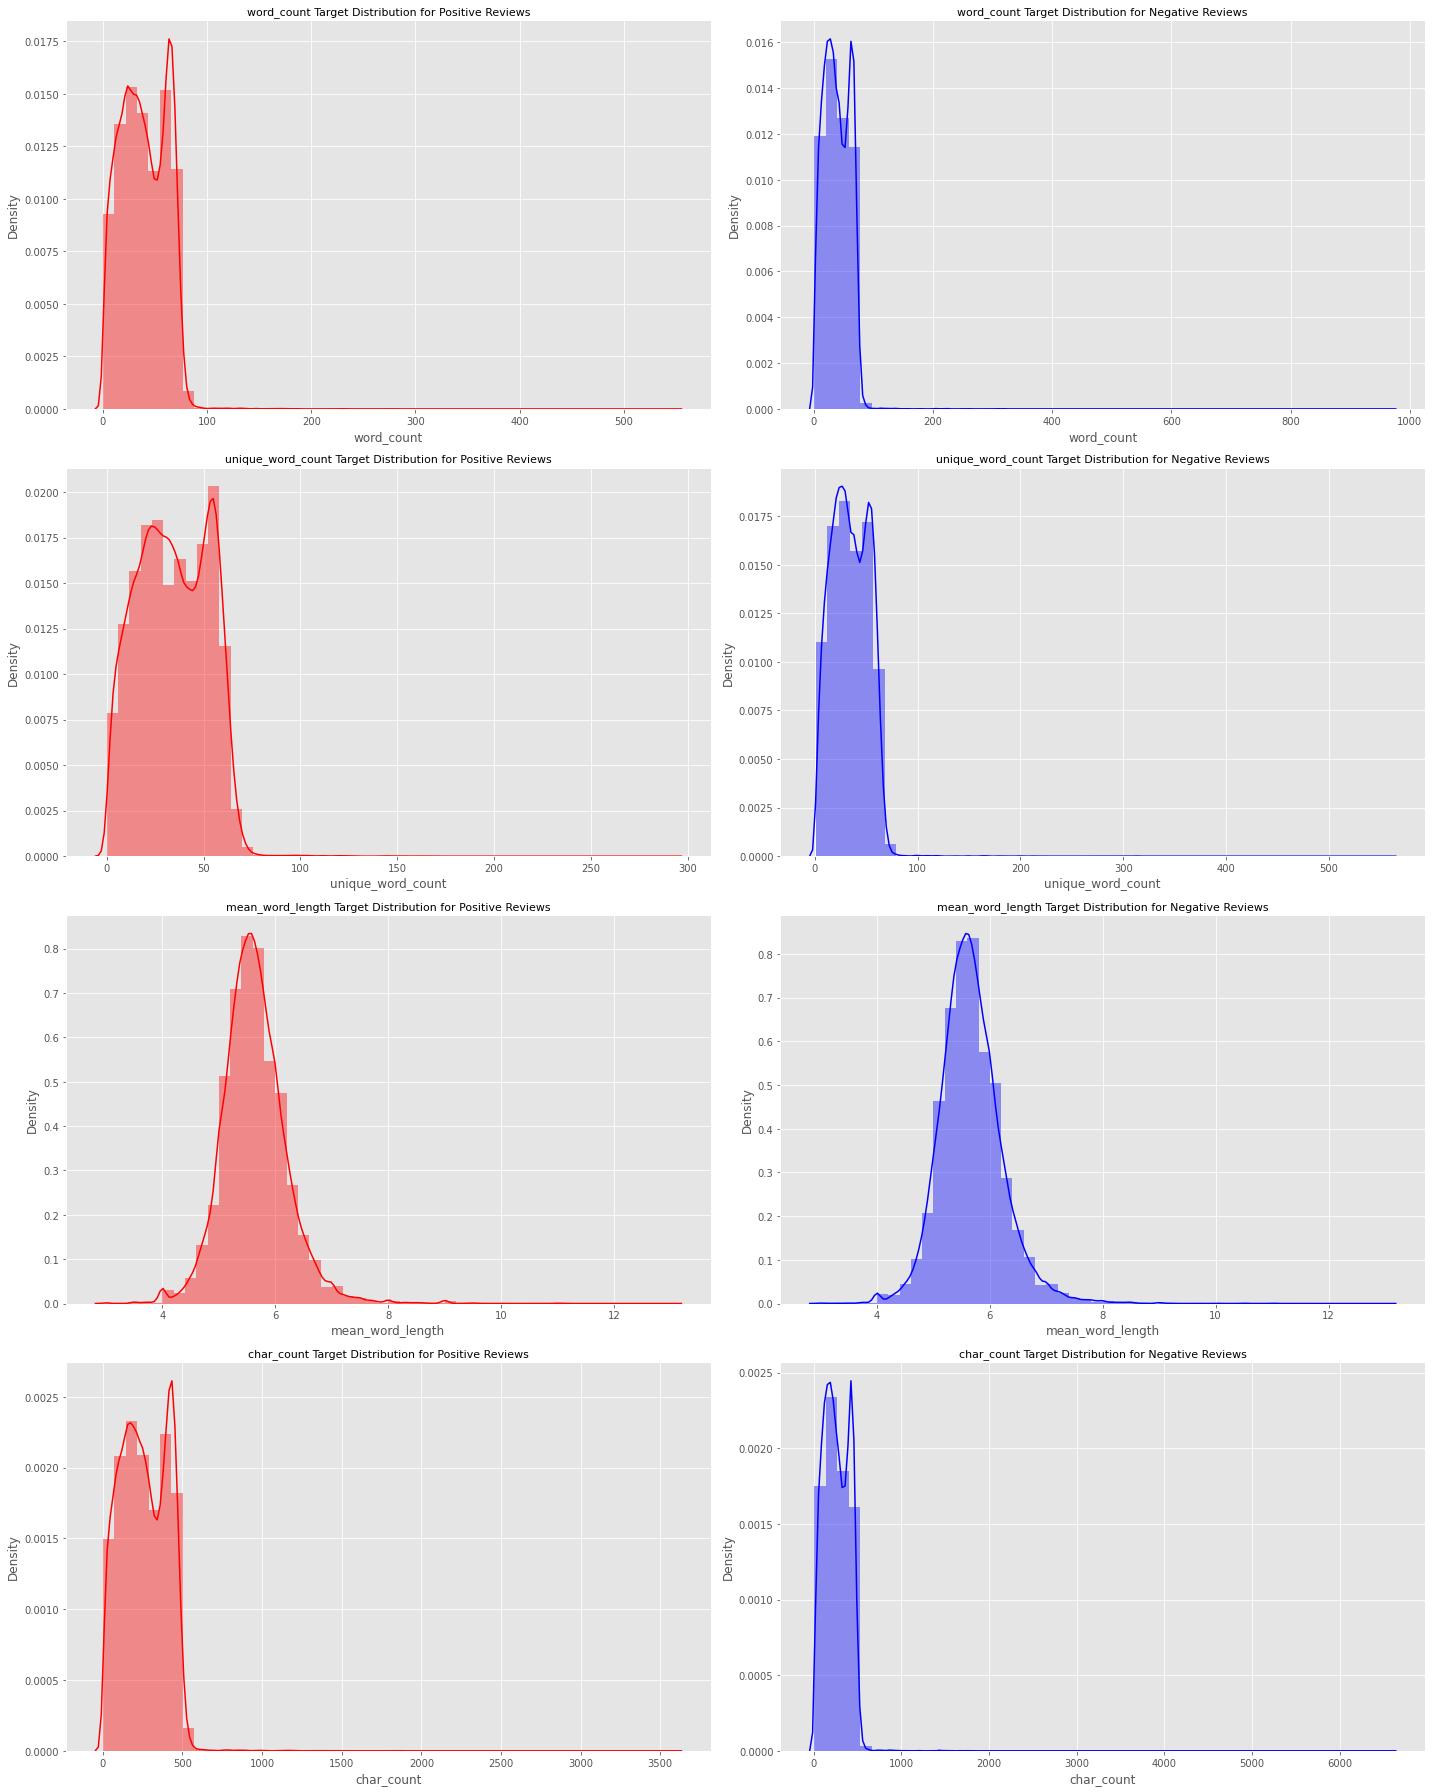

In [ ]:
#df_main2 = df_main.loc[(df_main['word_count'] <=200)] 

METAFEATURES = ['word_count', 'unique_word_count',   'mean_word_length',
                'char_count']
POSITIVE_REVIEWS = df_main['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 25))

for i, feature in enumerate(METAFEATURES):
    sns.distplot(df_main.loc[~POSITIVE_REVIEWS][feature], label='Negative', ax=axes[i][1], color='blue')
    sns.distplot(df_main.loc[POSITIVE_REVIEWS][feature], label='Positive', ax=axes[i][0], color='red')

    
    axes[i][0].set_title(f'{feature} Target Distribution for Positive Reviews', fontsize=11)
    axes[i][1].set_title(f'{feature} Target Distribution for Negative Reviews', fontsize=11)
plt.tight_layout()

In [ ]:
print(df_main['review'].apply(lambda x: len(x.split(' '))).sum())

4768975


### Re-applying some cleaning methods

In [ ]:

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text3(text):
    """
        text: a string
        
        return: modified initial string
    """
    #text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df_main['clean_text12'] = df_main['review'].apply(clean_text3)

In [ ]:
df_main.drop(['review'],axis=1,inplace=True)

In [ ]:
df_main['review'] = df_main['clean_text12']
df_main.drop(['clean_text12'],axis=1,inplace=True)

In [ ]:
df_main.drop(['word_count','unique_word_count', 'mean_word_length', 'char_count'],axis=1,inplace=False)

,rating,target,review
0,0,0,2nd day 5mg started work rock hard erection however experianced headache lower bowel preassure 3rd day erection would wake hurt leg ankle ache severe lower bowel preassure like need cannot enjoyed initial rockhard erection side effect 230 month supply work 3xs week worth side effect
1,0,0,pulled cummed bit took plan hour later took pregnancy test two week later pregnant
2,1,1,abilify changed life hope zoloft clonidine first started abilify age zoloft depression clondine manage complete rage mood control depressed hopeless one second mean irrational full rage next prescribed 2mg abilify point feel like cured though know polar disorder constant battle know abilify work tried get lost complete control emotion went back golden 5mg daily better ever past side effect like eat lot
3,0,0,nothing problem keppera constant shaking arm leg pin needle feeling arm leg severe light headedness appetite etc
4,1,1,taken anti depressant year improvement mostly moderate severe side affect make take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
...,...,...,...
121572,1,1,treatment adhd save life believe hype stigma around diagnosis treatment real condition real treatment make real profound difference life people debilitating condition afraid seek help think might adhd childhood illness opinion generally consists persists form duration life like disease
121573,1,1,3rd time taking medicine first time shin bone hurt bad week time left thumb palm far hurt badly medicine work ailes hope shin bone hurt bad time way prescription pill 750mg daily day
121574,0,0,medicine kept sleeping whole day body started shut eye would close mind would let sleep
121575,1,1,taken tamoxifen year side effect severe sweating depression taking effexor longer tamoxifen oncologist increased effexor dosage 150 per day assure effexor black cohoosh would stop sweating sweating increased depressed ever sonogram last month revealed small fibroid fluid uterus got appointment gyn next week see want handle uterus problem


### Outputing the datafile to be used lated

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df_main.to_csv('out.zip', index=False,
          compression=compression_opts)  

### Rechecking the embedding coverage

In [ ]:
# Checking GloVe coverage
data_glove_oov, data_glove_vocab_coverage, data_glove_text_coverage = check_embeddings_coverage(df_main['review'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Data Set'.format(data_glove_vocab_coverage, data_glove_text_coverage))

GloVe Embeddings cover 77.26% of vocabulary and 99.14% of text in Data Set


In [ ]:
# Checking FastText coverage
data_fasttext_oov, data_fasttext_vocab_coverage, data_fasttext_text_coverage = check_embeddings_coverage(df_main['review'], fasttext_embeddings)
print('FastText Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Data Set'.format(data_fasttext_vocab_coverage, data_fasttext_text_coverage))

FastText Embeddings cover 76.48% of vocabulary and 99.11% of text in Data Set


# Applying word2vec for similarities

In [ ]:
import re, string 
import pandas as pd   
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

df_main = pd.read_csv('/content/drive/MyDrive/WSU/Winter 2021/CSC 7810/Final Project/df_main_res.csv')
sentences = [row.split() for row in df_main['review']]

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
w2v_model = Word2Vec(min_count=25,
                     window=10,
                     vector_size=150,
                     workers=10)


                     
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)
#w2v_model.init_sims(replace=True)

(22861808, 26362740)

In [ ]:
w2v_model.wv.get_vector("rock", norm=True)

array([-0.11636754, -0.05160933,  0.00834581, -0.06622927,  0.01796944,
        0.07642823,  0.14501087, -0.14397953, -0.0080777 ,  0.00845089,
       -0.0153771 ,  0.02994127,  0.05427334,  0.09996984,  0.1670966 ,
        0.08146244,  0.01255845, -0.06958596, -0.0820341 , -0.1434449 ,
       -0.17910942, -0.05380867, -0.09480658, -0.07482589,  0.08045621,
        0.03604292,  0.08823938,  0.0181021 , -0.05004001,  0.11580686,
       -0.02818474, -0.01960319, -0.03078867, -0.04712911,  0.02863999,
        0.06438541, -0.00869196,  0.21434925,  0.04348026, -0.14780831,
        0.04664003, -0.00190628, -0.14721166,  0.05472353,  0.00463084,
       -0.01181133, -0.08240423,  0.00591579,  0.02080994, -0.04751614,
       -0.14354527,  0.13631438,  0.0357055 , -0.0432748 , -0.02438537,
        0.05221871, -0.07573868, -0.07156605,  0.02690454,  0.14238247,
        0.02324116,  0.01700505, -0.00660688,  0.08038659,  0.11372615,
        0.07293341, -0.15208115,  0.0334589 ,  0.05445434, -0.01

In [ ]:
w2v_model.wv.most_similar(positive=['recommend'])


[('reccomend', 0.843490719795227),
 ('suggest', 0.7779561877250671),
 ('recomend', 0.7626301646232605),
 ('advise', 0.661141574382782),
 ('discourage', 0.618000328540802),
 ('encourage', 0.5326123237609863),
 ('recommended', 0.4418681561946869),
 ('recommending', 0.4366134703159332),
 ('considering', 0.4301559031009674),
 ('rather', 0.4248034954071045)]

In [ ]:
rock_idx = w2v_model.wv.key_to_index["rock"]
rock_cnt = w2v_model.wv.get_vecattr("rock", "count")  # 👍
vocab_len = len(w2v_model.wv)

In [ ]:
w2v_model.wv.get_vector

<bound method KeyedVectors.get_vector of <gensim.models.keyedvectors.KeyedVectors object at 0x7f3d35bc3590>>

### TSNE Visualization of word similarities

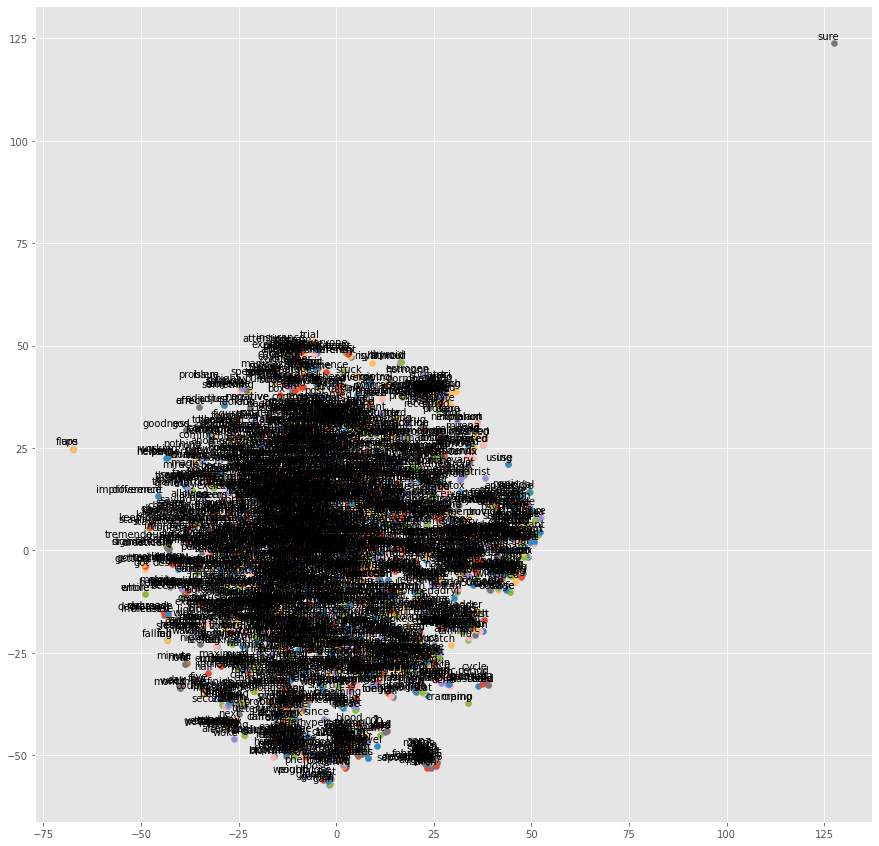

In [ ]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in w2v_model.wv.key_to_index:
        tokens.append(w2v_model.wv.get_vector(word))
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    z = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15, 15)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
   
tsne_plot(w2v_model)

In [ ]:
tsne_plot(w2v_model)